<a href="https://colab.research.google.com/github/BimsaraS99/water-level-graphing-using-edge-detection-openCV/blob/main/Water_Level_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Water Level Monitoring Computer Vision Task***


### ***Import essential libraries for the task***

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
cap = cv2.VideoCapture('/content/liquidVideo.mp4') # load video

### ***Find the number of frames, duaration and resultation of the video***

In [ ]:
num_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
fps = cap.get(cv2.CAP_PROP_FPS)
duration_seconds = num_frames / fps

frame_width = float(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = float(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

print(f"Number of frames : {num_frames}")
print(f"FPS of the video : {fps}")
print(f"Lenght of the video (s) : {duration_seconds}")
print(f"Frame width : {frame_width}")
print(f"Frame height : {frame_height}")

Number of frames : 240
FPS of the video : 10.0
Lenght of the video (s) : 24.0
Frame width : 120.0
Frame height : 216.0


### ***Checking video load***

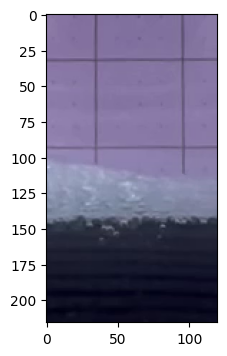

In [ ]:
ret, frame = cap.read()
cap.set(cv2.CAP_PROP_POS_FRAMES, 120) # frame at 20 sec
plt.figure(figsize=(8, 4))
plt.imshow(frame)
plt.show()

### ***Creating functions for the process***

***Detects level of the water with edge detetion***

In [ ]:
def process_frame(frame):
    hsv_image = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    lower_black = np.array([0, 0, 0])
    upper_black = np.array([180, 255, 70])

    mask = cv2.inRange(hsv_image, lower_black, upper_black)

    kernel = np.ones((6, 6), np.uint8)
    dilated_mask = cv2.dilate(mask, kernel, iterations=1)
    edges = cv2.Canny(dilated_mask, 100, 200)

    # Calculate the white and black pixel ratios
    total_pixels = mask.size
    white_pixels = np.count_nonzero(mask)
    black_pixels = total_pixels - white_pixels
    white_ratio = white_pixels / total_pixels

    return mask, dilated_mask, edges, white_ratio

***Find the average level of water***

In [ ]:
def find_mean_point(binary_image):
    white_rows = np.where(np.any(binary_image == 255, axis=1))[0]
    if len(white_rows) > 0:
      avg_row = int(np.mean(white_rows))
    else:
      avg_row = 0

    return avg_row

### ***Test run***

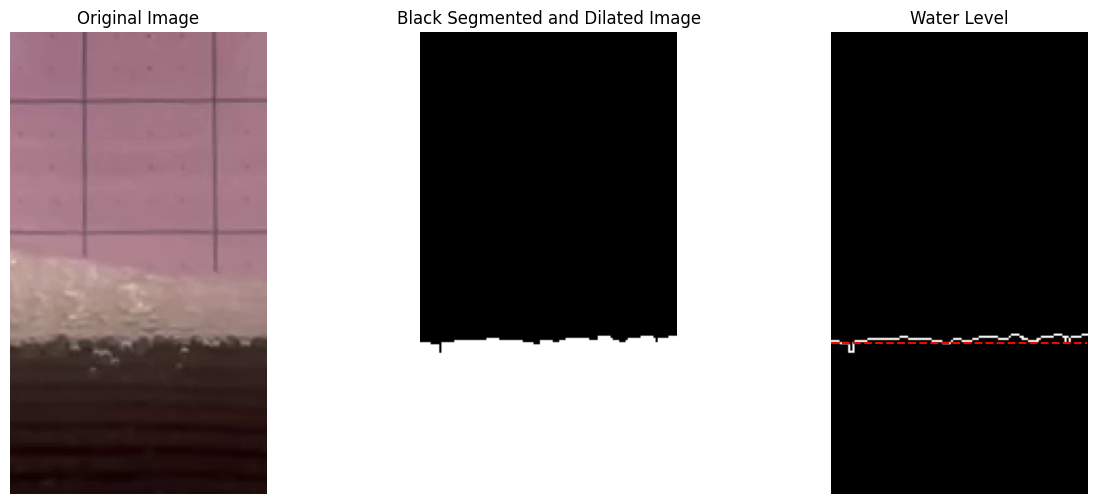

Mean water level:  145


In [ ]:
mask, dilated_mask, edges, black_white_ratio = process_frame(frame)
mean_point = find_mean_point(edges)

plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(dilated_mask, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Black Segmented and Dilated Image')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))
plt.axhline(y=mean_point, color='red', linestyle='--')  # Draw a red dashed line at the mean point
plt.axis('off')
plt.title('Water Level')

plt.show()

print("Mean water level: ", mean_point)

### ***Process the video with created fucntions***

In [ ]:
cap = cv2.VideoCapture('/content/liquidVideo.mp4')
water_level_list = []

while True:
    ret, frame = cap.read()
    if not ret:
        break
    mask, dilated_mask, edges, black_white_ratio = process_frame(frame)
    mean_value_point = find_mean_point(edges) # coordinate
    mean_value = mean_value_point # y-value

    mean_water_level = 0 if math.isnan(mean_value) else float(frame_height - mean_value)

    mean_water_level = 0 if black_white_ratio == 0.0 else mean_water_level

    water_level_list.append(mean_water_level)

***Mapping to 100%***

In [ ]:
water_level_list = [x / (frame_height/100) for x in water_level_list]

### ***Final Result***

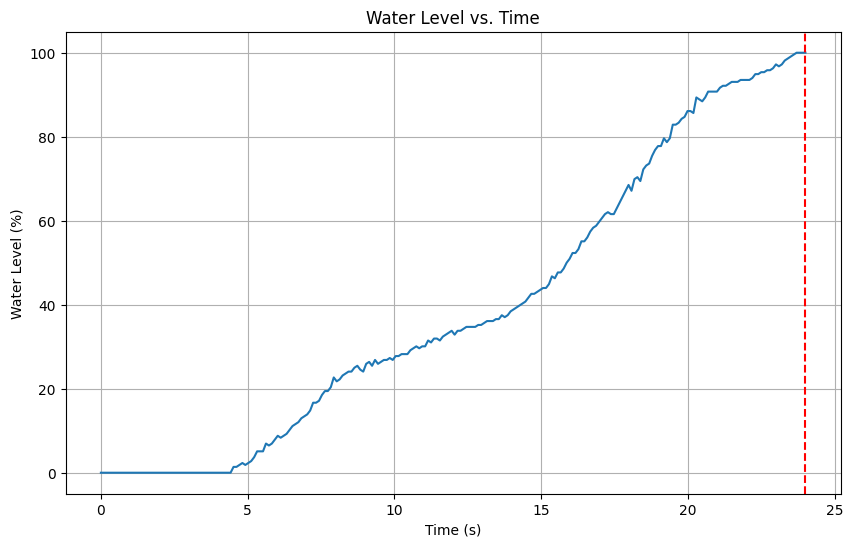

In [ ]:
y_values = water_level_list
x_values = np.linspace(0, 24, len(y_values))

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values)
plt.axvline(x=24, color='r', linestyle='--')  # Vertical line at x=24
plt.xlabel('Time (s)')
plt.ylabel('Water Level (%)')
plt.title('Water Level vs. Time')
plt.grid(True)
plt.show()